# Support Vector Regression (SVR) Hands-on Exercise

In this exercise, we will implement and train a Support Vector Regression model using JAX and evaluate its performance on synthetic data. We will go through the steps of data generation, model training, and evaluation.

### Objectives

- Generate synthetic data for regression
- Implement SVR using JAX
- Train the SVR model
- Evaluate the model's performance
- Visualize the results


### Step 1: Import Libraries

We will begin by importing the necessary libraries. JAX will be used for numerical computations, NumPy for array manipulations, and Matplotlib for visualization.


In [1]:
import jax
import jax.numpy as jnp
import jax.scipy.optimize
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split


### Step 2: Define the SVR Class

We will create a class `SVR` to encapsulate the SVR model. The class will include methods for calculating the loss, training the model, and making predictions.

#### Loss Function

The loss function for SVR is defined as:

$$ L(w) = \lambda \|w\|^2 + \frac{1}{n} \sum_{i=1}^{n} \max(0, |f(x_i) - y_i| - \epsilon) $$

Where:

- $ w $ are the model parameters.
- $ \lambda $ is the regularization parameter.
- $ \epsilon $ is the epsilon-insensitive loss threshold.
- $ f(x_i) $ is the predicted value for input \( x_i \).
- $ y_i $ is the actual target value.

Let's define the `SVR` class.


In [2]:
class SVR:
    def __init__(self, epsilon=0.1, lmbda=1.0):
        self.epsilon = epsilon
        self.lmbda = lmbda
        self.w = None

    def loss(self, params, X, y):
        part1 = self.lmbda * jnp.linalg.norm(self.w)**2
        
        pred = jnp.dot(X, params[:-1]) + params[-1]
        part2 = jnp.mean(jnp.maximum(0, jnp.abs(y - pred) - self.epsilon))
        return part1 + part2

    def train(self, X, y):
        _, n_features = X.shape

        self.w = jnp.zeros(n_features + 1)  # +1 for bias term
        
        # Solve optimization problem
        opt_res = jax.scipy.optimize.minimize(
            self.loss, self.w, method="BFGS", args=(X, y)
        )
        self.w = opt_res.x

    def predict(self, X):
        return jnp.dot(X, self.w[:-1]) + self.w[-1]

### Step 3: Generate Synthetic Data

Next, we will generate synthetic data for regression. We will create a linear relationship with added Gaussian noise.

- We will generate $ n\_{samples} $ data points.
- The true relationship will follow the equation $ y = mx + c $.
- Gaussian noise will be added to simulate real-world data.


In [4]:
np.random.seed(0)  # For reproducibility
m = 2.5  # Slope
c = 1.0  # Intercept
n_samples = 100

key = jax.random.PRNGKey(0)
# Generate X values uniformly distributed between 0 and 10
X = jnp.linspace(0, 10, n_samples).reshape(-1, 1)

noise = jax.random.normal(key, shape=(n_samples,))
# Create the line (y = mx + c) and add Gaussian noise
y = m * X.flatten() + c + noise

### Step 4: Split the Data

Now, we will split the dataset into training and testing sets. This allows us to evaluate the model's performance on unseen data.

We will use an 80-20 split for training and testing.


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Convert data to JAX arrays
X_train = jnp.asarray(X_train)
y_train = jnp.asarray(y_train)
X_test = jnp.asarray(X_test)
y_test = jnp.asarray(y_test)

### Step 5: Train the SVR Model

We will now create an instance of the `SVR` class and train the model using the training data.


In [10]:
svr = SVR(epsilon=0.5, lmbda=0.1)

svr.train(X_train, y_train)

### Step 6: Make Predictions

After training, we will use the model to make predictions on both the training and testing datasets.


In [11]:
y_pred_train = svr.predict(X_train)
y_pred_test = svr.predict(X_test)

### Step 7: Evaluate the Model

We will evaluate the model's performance using the Mean Squared Error (MSE), which is defined as:

$$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

Where:

- $ y_i $ is the actual value.
- $ \hat{y}_i $ is the predicted value.
- $ n $ is the number of samples.


In [12]:
mse_train = jnp.mean((y_train - y_pred_train) ** 2)
mse_test = jnp.mean((y_test - y_pred_test) ** 2)

print(f"Train MSE: {mse_train:.4f}")
print(f"Test MSE: {mse_test:.4f}")

Train MSE: 0.8926
Test MSE: 0.8746


### Step 8: Visualize the Results

Finally, we will visualize the training data, test data, and the model's predictions. This will help us understand how well our model has captured the underlying relationship.


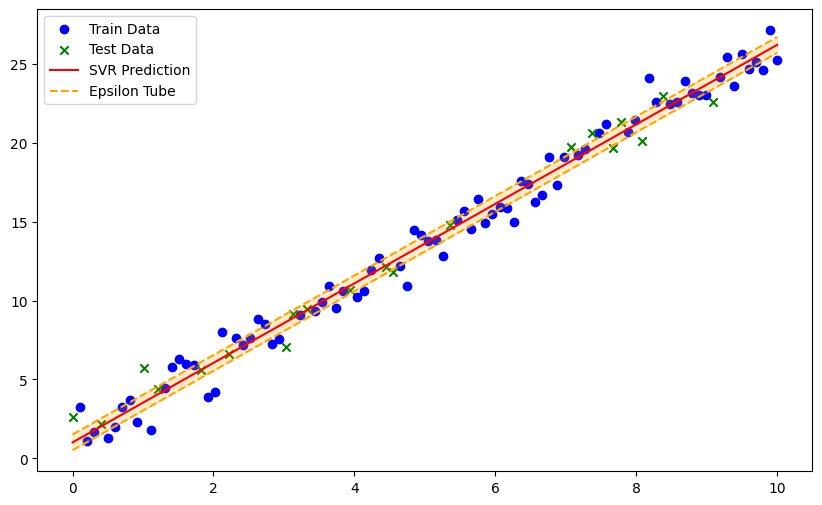

In [15]:
plt.figure(figsize=(10, 6))

x_range = jnp.linspace(0, 10, 100).reshape(-1, 1)
y_range = svr.predict(x_range)

plt.scatter(X_train, y_train, color="blue", label="Train Data")
plt.scatter(X_test, y_test, color="green", label="Test Data", marker='x')

plt.plot(x_range, y_range, color="red", label="SVR Prediction")
plt.plot(x_range, y_range-svr.epsilon, color="orange", linestyle="--", label="Epsilon Tube")
plt.plot(x_range, y_range+svr.epsilon, color="orange", linestyle="--")
plt.fill_between(x_range.flatten(), (y_range-svr.epsilon).flatten(), (y_range+svr.epsilon).flatten(), color="orange", alpha=0.2)

plt.legend()

# Support Vector Machine (SVM)

We will change the previous code to implement a linear Support Vector Machine in primal formulation

### Step 2: Define the SVM Class

We will create a class `SVM` to encapsulate the SVM model. The class will include methods for calculating the loss, training the model, and making predictions.

### Loss Function
The loss function for SVM is defined as the hinge loss:

$$ L(w) = \lambda \|w\|^2 + \frac{1}{n} \sum_{i=1}^{n} \max(0, 1 - y_i (w^T x_i + b)) $$

Where:
- $ w $ are the model parameters (weights).
- $ b $ is the bias term.
- $ \lambda $ is the regularization parameter.
- $ y_i $ is the true label for the sample $ i $.
- $ x_i $ is the feature vector for the sample $ i $.
- The first term is the regularization term, and the second term is the hinge loss.

Let's define the `SVM` class.

In [28]:
class SVM:
    def __init__(self, lmbda=1.0):
        self.lmbda = lmbda
        self.w = None

    def loss(self, params, X, y):
        part1 = self.lmbda * jnp.linalg.norm(self.w)**2

        pred = jnp.dot(X, params[:-1]) + params[-1]
        part2 = jnp.mean(jnp.maximum(0,1-y*pred))
        return part1 + part2

    def train(self, X, y):
        # Initialize weights and bias
        _, n_features = X.shape
        self.w = jnp.zeros(n_features + 1)  # +1 for bias
        
        # Solve optimization problem
        opt_res = jax.scipy.optimize.minimize(self.loss, self.w, method="BFGS", args=(X, y))
        self.w = opt_res.x

    def predict(self, X):
        # Decision function
        decision = jnp.dot(X, self.w[:-1]) + self.w[-1]
        return jnp.sign(decision)

### Step 3: Generate Synthetic Classification Data

Next, we will generate synthetic data for classification. We will create a dataset of points in a 2D space and label them based on their coordinates.

- We will generate $ n_{samples} $ data points.
- The labels will be determined by the condition $ x_1 + x_2 > 10 $ to classify points into two categories.

In [30]:
np.random.seed(42)  # For reproducibility
n_samples = 100

X = np.random.uniform(0, 10, (n_samples, 2))
y = np.where(X[:,0]+X[:,1] > 10, 1, -1)

### Step 4: Split the Data

Now, we will split the dataset into training and testing sets. This allows us to evaluate the model's performance on unseen data.

We will use an 80-20 split for training and testing.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to JAX arrays
X_train = jnp.asarray(X_train)
y_train = jnp.asarray(y_train)
X_test = jnp.asarray(X_test)
y_test = jnp.asarray(y_test)

### Step 5: Train the SVM Model

We will now create an instance of the `SVM` class and train the model using the training data.

In [32]:
svm = SVM(lmbda=0.001)
svm.train(X_train, y_train)

### Step 6: Make Predictions

After training, we will use the model to make predictions on both the training and testing datasets.

In [33]:
y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)

### Step 7: Evaluate the Model

We will evaluate the model's performance using accuracy, which is defined as the proportion of correct predictions:

$$ \text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}} $$

Let's calculate and print the accuracy for both the training and test sets.

In [34]:
accuracy_train = jnp.mean(y_pred_train == y_train)
accuracy_test = jnp.mean(y_pred_test == y_test)

print(f"Train Accuracy: {accuracy_train:.4f}")
print(f"Test Accuracy: {accuracy_test:.4f}")

Train Accuracy: 1.0000
Test Accuracy: 0.9500


### Step 8: Visualize the Results

Finally, we will visualize the training data, test data, and the decision boundary of the SVM model. This will help us understand how well our model has separated the classes.

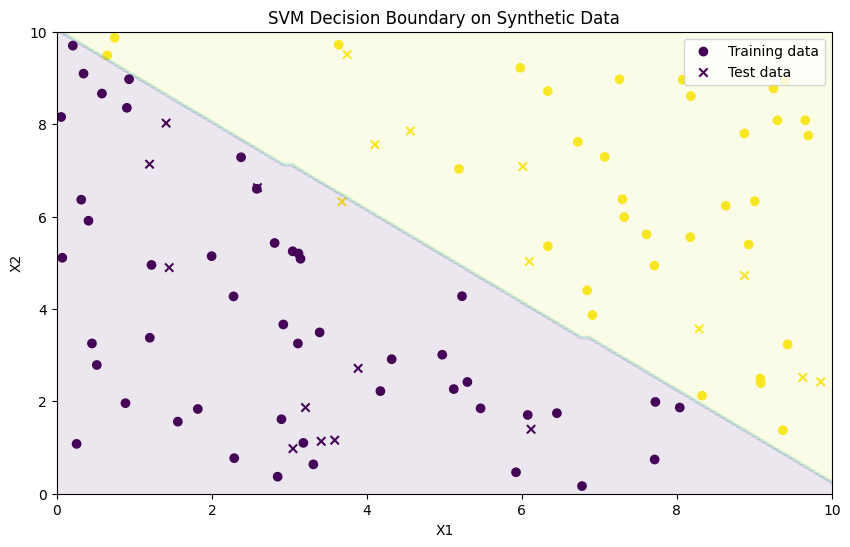

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, label='Training data', marker='o')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, label='Test data', marker='x')

# Plot the decision boundary
t = np.linspace(0, 10, 100)
xx1, xx2 = np.meshgrid(t, t)
xx = np.stack([xx1.flatten(), xx2.flatten()], axis=1)
yy = svm.predict(xx)
plt.contourf(xx1, xx2, yy.reshape(xx1.shape), alpha=0.1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('SVM Decision Boundary on Synthetic Data')
plt.legend(loc="upper right")
plt.show()